We will first upload our cleaned STEM and non-STEM data onto our Python Notebook.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving STEM - STEM Data.csv to STEM - STEM Data.csv


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Non-STEM - Non-STEM Data.csv to Non-STEM - Non-STEM Data.csv


In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
stem_df = pd.read_csv("STEM - STEM Data.csv", index_col=0)
non_stem_df = pd.read_csv("Non-STEM - Non-STEM Data.csv", index_col=0)

In [ ]:
non_stem_df = non_stem_df.replace(',', '', regex=True)
non_stem_df

,Top Genres,Use Spotify & Have Stats?,Minutes Listened,Stress Levels,Music and Studies,Music Heaviness
Field of Study,,,,,,
English,Indie pop Bedroom pop K-Pop Pop,Yes,40258,3,4,1
International relations,Kpop pop hip-hop r&b,I do not use Spotify,39370,3,4,3
English Literature,Pop modern rock indie pop bedroom pop,Yes,15000,4,4,2
History,indie pop j-pop pop opm,Yes,109637,4,5,4
Business,Rap Hip-Hop Pop,I do not use Spotify,76349,4,5,1
Social Studies,indie pop pop bedroom bop and rap,Yes,57722,4,4,3
Photography,Punk pop punk rock metal,No,75110,3,4,2
Music education,Sad raprock glam rock gen z somgwriter,Yes,32722,3,5,3
Psychology,Rap Osts Pop Indian,I do not use Spotify,3620,4,5,3


In [ ]:
stem_df = stem_df.replace(',', '', regex=True)
stem_df

,Top Genres,Use Spotify & Have Stats?,Minutes Listened,Stress Levels,Music and Studies,Music Heaviness
Field of Study,,,,,,
Data Science,Filmi Tollywood Kpop Modern Bollywood,Yes,27754,4,5,2
CSIS,Jazz Original Soundtracks 70s Rock Pop,Yes,75000,3,4,3
Machine Learning and Data Science,Rap rnb hip hop house,Yes,31788,4,5,4
Medical science,Pop rock Latin and country,No,50258,5,5,3
Astronomy,Rap Electronic Hyperpop Rock,No,84252,1,4,3
Artificial intelligence and machine learning,Filmi tamil pop desi hip hop tamil hip hop,Yes,14000,3,5,3
Computer Science,Progressive House Pop Electronic Dance music R...,Yes,29248,5,5,1
Artificial Intelligence & Data Science,Filmi Pop Rap Tollywood,Yes,46273,5,5,4
Electronics,Telugu Hip Hop R & B Rap,No,45256,4,5,5


In [ ]:
non_stem_df['Minutes Listened'] = non_stem_df['Minutes Listened'].astype(int)
stem_df['Minutes Listened'] = stem_df['Minutes Listened'].astype(int)

import scipy.stats
_, p = scipy.stats.ttest_ind(stem_df["Minutes Listened"],non_stem_df["Minutes Listened"])
p

0.5943532889416374

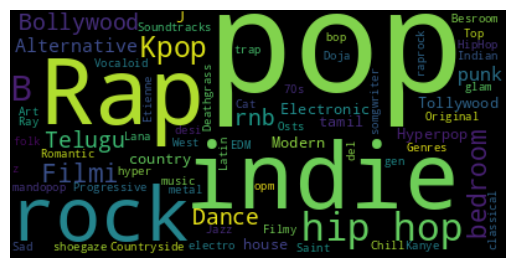

In [ ]:
stem_df.reset_index(inplace=True)
non_stem_df.reset_index(inplace=True)
combined_data = pd.concat([stem_df,non_stem_df], join = 'outer')
top_genres = combined_data[["Top Genres"]]
wordcloud = WordCloud().generate(str(top_genres))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
contingency = pd.crosstab(non_stem_df["Top Genres"], stem_df["Top Genres"])
_, p, _, _ = scipy.stats.chi2_contingency(contingency)
p

0.23290755488982084

In [ ]:
contingency = pd.crosstab(non_stem_df["Stress Levels"], stem_df["Stress Levels"])
_, p, _, _ = scipy.stats.chi2_contingency(contingency)
p

0.7572232071985853

[-1236.70588235]
0.0005524843156681225


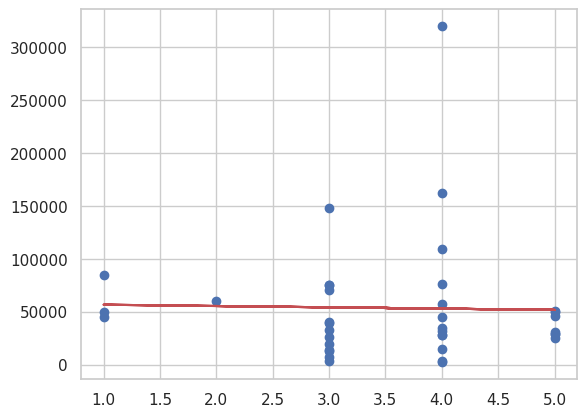

In [ ]:
import sklearn.linear_model as lm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

total_stress_stem = stem_df['Stress Levels'].tolist()
total_stress_nonstem = non_stem_df['Stress Levels'].tolist()
total_stress = total_stress_stem + total_stress_nonstem
total_stress = np.array(total_stress)
total_stress = total_stress.reshape(-1,1)
total_stress

stem_mins = stem_df['Minutes Listened'].tolist()
non_stem_mins = (non_stem_df['Minutes Listened'].tolist())
total_mins = stem_mins + non_stem_mins
total_mins = np.array(total_mins)
total_mins

linear_model = LinearRegression()
linear_model.fit(total_stress,total_mins)
y_hat = linear_model.predict(total_stress)
plt.plot(total_stress,total_mins,'o')
plt.plot(total_stress,y_hat,'r')
coef_determination = r2_score(total_mins, y_hat)
print(linear_model.coef_)
print(coef_determination)


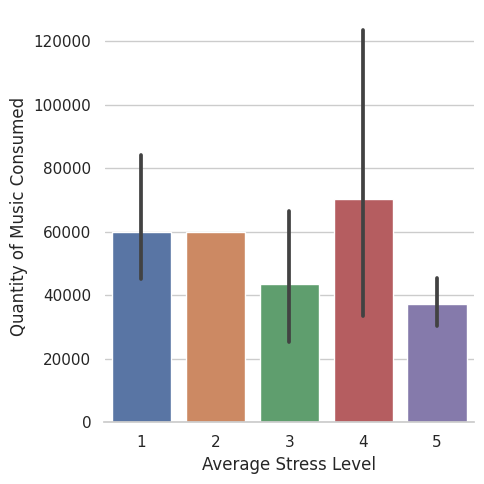

In [ ]:
import seaborn as sns

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=combined_data, kind="bar",
    x="Stress Levels", y="Minutes Listened",
)

g.despine(left=True)
g.set_axis_labels("Average Stress Level", "Quantity of Music Consumed")

(0.0, 602003.8008419467)

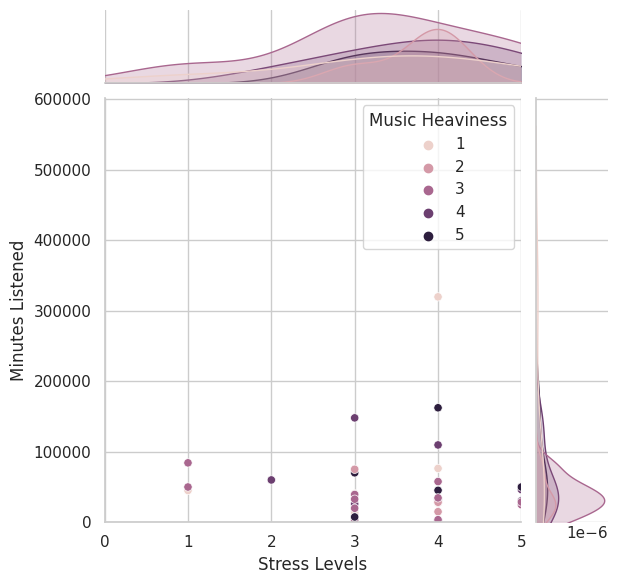

In [ ]:
data = combined_data
g = sns.jointplot(data=combined_data, x="Stress Levels", y="Minutes Listened", hue="Music Heaviness")
g.ax_joint.set_xlim(left=0, right=5)
g.ax_joint.set_ylim(bottom=0)

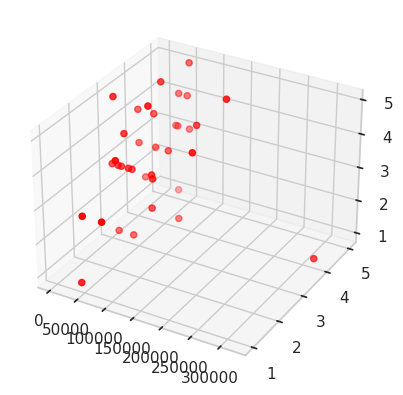

In [ ]:
stem_heaviness = stem_df['Music Heaviness'].tolist()
non_stem_heaviness = non_stem_df['Music Heaviness'].tolist()
total_heaviness = stem_heaviness + non_stem_heaviness
total_heaviness = np.array(total_heaviness)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(total_mins, total_stress, total_heaviness, color = 'red')

In [ ]:
x = np.concatenate((total_mins.reshape(-1, 1), total_stress), axis=1)
temp_model = LinearRegression()
temp_model.fit(x, total_heaviness)
print(temp_model.coef_)
print(temp_model.intercept_)

#output = since first coef is less than 0, this data suggests that the amount of music consumed does not have a strong correlation with the heaviness of music consumed. the other coef is greater than 0 and is large, which suggets that there may be a correlation between total stress and the heaviness of music consumed
#intercept suggets that when the values of music consumed and amount of stress is 0, students will still listen to heavier music

[-1.40479654e-06  1.35308988e-01]
2.6500765858792623


In [ ]:
total_mins = total_mins.reshape(-1, 1)
totals = np.concatenate((total_mins, total_stress, total_heaviness.reshape(-1, 1)), axis=1)
correlation = np.corrcoef(totals, rowvar=False)
correlation
#correlation denotes how strongly two variables are related

array([[ 1.        , -0.02350498, -0.06776877],
       [-0.02350498,  1.        ,  0.12047043],
       [-0.06776877,  0.12047043,  1.        ]])